In [ ]:
# Importação das bibliotecas

import numpy as np #operações matemátcas
import matplotlib.pyplot as plt #plot de gráficos

import pandas as pd # manipulação de arquivos (csv, txt)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Carregamento do arquivo .csv com os dados do Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titulos_tabela = np.array([
    "lp", #Lever Position
    "v", #Ship Speed
    "GTT", #Gas Turbine Shaft Torque
    "GTn", #Gas Turbine Rate of Revolutions
    "GGn", #Gas Generator Rate of Revolutions
    "Ts", #Starboard Propeller Torque
    "Tp", #Port Propeller Torque
    "T48", #HP Turbine Exit Temperature
    "T1", #GT Compressor Inlet air Pressure
    "T2", #GT Compressor Outlet air Temperature
    "P48", #HP Turbine Exhaust Gas Pressure
    "P1", #GT Compressor Inlet Air Pressure
    "P2", #GT Compressor Outlet Air Pressure
    "Pexh", #Gas Turbine Exhaust Gas Pressure
    "TIC", #Turbine Injecton Control
    "mf", #Fuel Flow
    "C1", #GT Compressor Decay State Coefficient
    "C2"]) #GT Turbine Decay State Coefficient

dataframe = pd.read_csv(
    '/content/drive/MyDrive/Arquivos/Aplicações - Redes Neurais/Trabalhos/T3: Regressão Linear (MLP)/data.txt', 
    sep="   ", 
    header=None, 
    names=titulos_tabela)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
dataframe

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,C1,C2
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [ ]:
dataframe.head(10)

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,C1,C2
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
5,6.175,18.0,29792.731,2307.404,8828.360,246.278,246.278,800.434,288.0,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975
6,7.148,21.0,38982.180,2678.086,9132.429,332.077,332.077,854.747,288.0,699.954,2.963,0.998,15.679,1.035,45.881,0.908,0.95,0.975
7,8.206,24.0,50996.808,3087.561,9318.562,437.989,437.989,952.122,288.0,741.770,3.576,0.998,18.632,1.040,62.440,1.236,0.95,0.975
8,9.300,27.0,72763.329,3560.395,9778.528,644.905,644.905,1115.797,288.0,789.094,4.498,0.998,22.811,1.049,92.556,1.832,0.95,0.975
9,1.138,3.0,379.880,1355.375,6683.916,7.915,7.915,464.017,288.0,550.985,1.100,0.998,5.963,1.019,3.879,0.079,0.95,0.976


In [ ]:
dataframe.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,C1,C2
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
dados = dataframe.iloc[:, :16].values
#Obtenção dos dados do compressor na saída C1
resultados_C1 = dataframe.iloc[:, 16].values

#Obtenção dos dados da turbina na saída C2
resultados_C2 = dataframe.iloc[:, 17].values

In [ ]:
dados_train_C1, dados_test_C1, resultados_train_C1, resultados_test_C1 = train_test_split(dados, resultados_C1, test_size=0.33)
dados_train_C2, dados_test_C2, resultados_train_C2, resultados_test_C2 = train_test_split(dados, resultados_C2, test_size=0.33)

In [ ]:
scalerDados_C1 = MinMaxScaler()
scalerDados_C1.fit(dados_train_C1)
dadosTrain_norm_C1 = scalerDados_C1.transform(dados_train_C1)
dadosTest_norm_C1 = scalerDados_C1.transform(dados_test_C1)

scalerResultados_C1 = MinMaxScaler()
scalerResultados_C1.fit(resultados_train_C1.reshape(-1, 1))
resultadosTrain_norm_C1 = scalerResultados_C1.transform(resultados_train_C1.reshape(-1, 1))
resultadosTest_norm_C1 = scalerResultados_C1.transform(resultados_test_C1.reshape(-1, 1))

scalerDados_C2 = MinMaxScaler()
scalerDados_C2.fit(dados_train_C2)
dadosTrain_norm_C2 = scalerDados_C2.transform(dados_train_C2)
dadosTest_norm_C2 = scalerDados_C2.transform(dados_test_C2)

scalerResultados_C2 = MinMaxScaler()
scalerResultados_C2.fit(resultados_train_C2.reshape(-1, 1))
resultadosTrain_norm_C2 = scalerResultados_C2.transform(resultados_train_C2.reshape(-1, 1))
resultadosTest_norm_C2 = scalerResultados_C2.transform(resultados_test_C2.reshape(-1, 1))

In [ ]:
modelo_C1 = MLPRegressor(hidden_layer_sizes=20, activation='logistic', max_iter = 1000, solver="lbfgs")
modelo_C1.fit(dadosTrain_norm_C1, resultadosTrain_norm_C1)

modelo_C2 = MLPRegressor(hidden_layer_sizes=20, activation='logistic', max_iter = 1000, solver="lbfgs")
modelo_C2.fit(dadosTrain_norm_C2, resultadosTrain_norm_C2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=20, max_iter=1000,
             solver='lbfgs')

In [ ]:
resultadosPred_norm_C1 = modelo_C1.predict(dadosTest_norm_C1)

resultadosPred_norm_C2 = modelo_C2.predict(dadosTest_norm_C2)

In [ ]:
resultadosPred_norm_C1 = modelo_C1.predict(dadosTest_norm_C1).reshape(-1,1)

resultados_pred_C1 = scalerResultados_C1.inverse_transform(resultadosPred_norm_C1)

resultadosPred_norm_C2 = modelo_C2.predict(dadosTest_norm_C2).reshape(-1,1)

resultados_pred_C2 = scalerResultados_C2.inverse_transform(resultadosPred_norm_C2)

In [ ]:
erro_C1 = mean_squared_error(resultados_test_C1, resultados_pred_C1)
print("O erro médio quadrático de C1 é: %.7f" % np.sqrt(erro_C1)) 
# erro médio quadrático gerado  para C1 nessa instância de testes: 0.0058707

erro_C2 = mean_squared_error(resultados_test_C2, resultados_pred_C2)
print("O erro médio quadrático de C2 é: %.7f" % np.sqrt(erro_C2)) 
# erro médio quadrático gerado para C2 nessa instância de testes: 0.0022257

O erro médio quadrático de C1 é: 0.0008116
O erro médio quadrático de C2 é: 0.0005617


In [ ]:
medidaR2_C1 = r2_score(resultados_test_C1, resultados_pred_C1)
print("A medida R2 para C1 é: %.5f" % medidaR2_C1) 
# medida R2 gerada para C1 nessa instância de testes: 0.84228

medidaR2_C2 = r2_score(resultados_test_C2, resultados_pred_C2)
print("A medida R2 para C2 é: %.5f" % medidaR2_C2) 
# medida R2 gerada para C1 nessa instância de testes: 0.91222

A medida R2 para C1 é: 0.99690
A medida R2 para C2 é: 0.99438


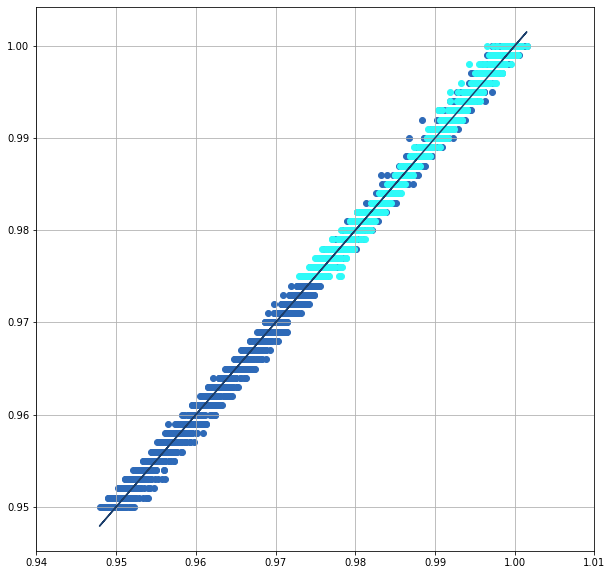

In [ ]:
# Plot do gráfico comparando as informações do resultado 1 (#GT Compressor Decay State Coefficient )

plt.figure(figsize=(10, 10))

plt.scatter(resultados_pred_C1, resultados_test_C1, color = "#2E6AB8")
plt.scatter(resultados_pred_C2, resultados_test_C2, color = "#2EFAF8")

plt.plot(resultados_pred_C1, resultados_pred_C1, color="#1B3E6B")
plt.xlim(0.94, 1.01)
plt.grid()

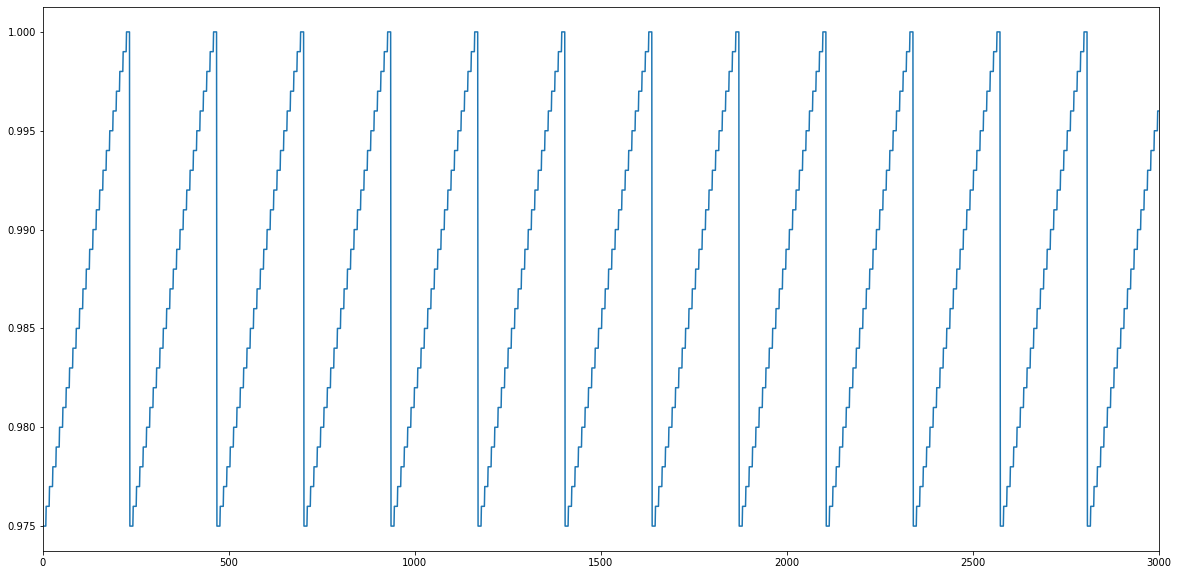

In [ ]:
dataframe['C2'].plot(figsize = (20, 10), xlim=[0, 3000])

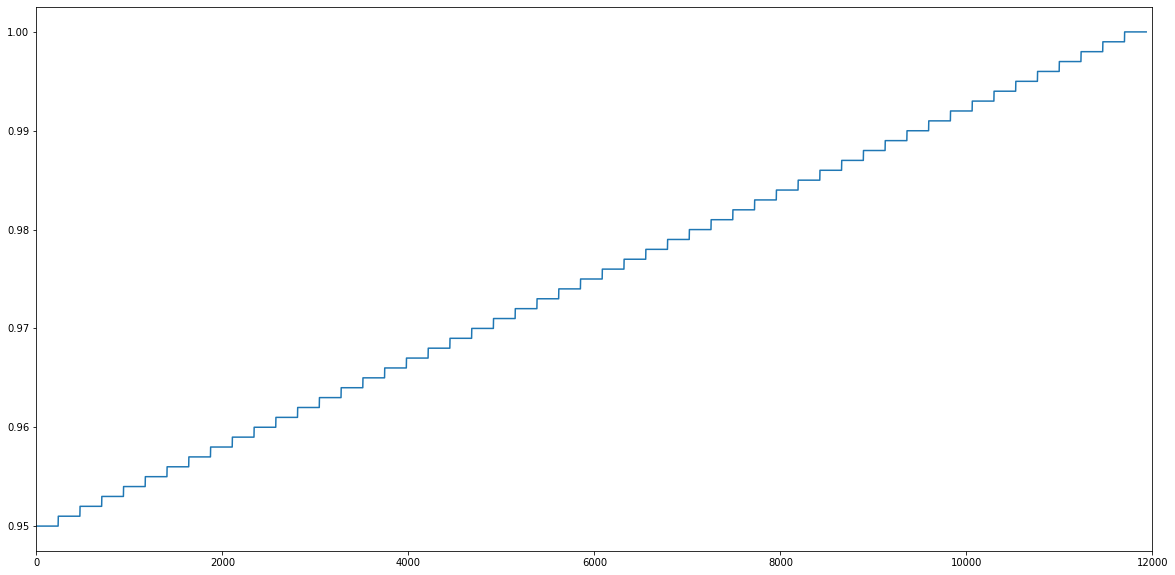

In [ ]:
dataframe['C1'].plot(figsize = (20, 10), xlim=[0, 12000])